In [87]:
import gzip
import shutil
import os 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_dir = r'C:\Users\EcW78\cse5713_data-mining-project\eric_wang\data'
fileset = os.listdir(file_dir)

In [3]:
# opening with gzip 

# with gzip.open('SM5075659_p007n.tsv.gz', 'rb') as f:
#     tsv_file = f.read()
#     df = csv.reader(tsv_file, delimiter="\t")
# #     number_of_lines = 10

# #     for i in range(number_of_lines):
# #         line = read_tsv.readline()
    
# print(df)

# opening all tsv files

def file_to_df(file_dir, file_name):
    if file_name.endswith(".tsv"):
        df=pd.read_csv(os.path.join(file_dir, file_name), sep='\t')
        return df
    elif file_name.endswith(".txt"):
        df=pd.read_csv(os.path.join(file_dir, file_name), sep='\t')
        return df
    elif file_name.endswith(".csv"):
        df=pd.read_csv(os.path.join(file_dir, file_name), sep=',')
        return df
    else:
        raise ValueError
        print("File Not Recognized")

In [22]:
data_dir = r'C:\Users\EcW78\cse5713_data-mining-project\eric_wang\data'

# df_normal = pd.read_csv(os.path.join(data_dir, 'GSM5075659_p007n.tsv'), sep='\t', header=None)
# df_tumor = pd.read_csv(os.path.join(data_dir, 'GSM5075660_p007t.tsv'), sep='\t', header=None)

df_normal = pd.read_csv(os.path.join(data_dir, 'GSM5075659_p007n.tsv'), sep='\t')
df_tumor = pd.read_csv(os.path.join(data_dir, 'GSM5075660_p007t.tsv'), sep='\t')

In [27]:
df_normal.head()

,gene,p007n:AACCCAACAGTTGCGC,p007n:AACAACCGTGTTCAGT,p007n:AACGTCACAACCAACT,p007n:AAACGCTAGACCAAGC,p007n:AACGAAACACGATAGG,p007n:AACCTGATCGGCTGGT,p007n:AAAGGTAGTGTTGAGG,p007n:AACAAGAGTAGTTCCA,p007n:AAACGCTTCGTAGGAG,...,p007n:GTTCATTGTGGCCTCA,p007n:GTTCATTCAACCCTCT,p007n:TACCTCGAGCTGCCAC,p007n:TATCTGTCAAGCGCAA,p007n:TAGACCACAAGAGTAT,p007n:TATGTTCAGTGGTCAG,p007n:TCCTAATTCCGTGTGG,p007n:TGGTACATCTGCGGCA,p007n:TGGCGTGAGACTCAAA,p007n:TTTAGTCCAAGTATAG
0,LINC00115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,FAM41C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AL645608.1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,NOC2L,0,0,0,0,0,0,2,0,0,...,0,1,0,1,0,0,0,0,0,0
4,PERM1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_tumor.head()

,gene,p007t:AACAACCAGTTGTCGT,p007t:AACCATGAGAAGCGGG,p007t:AAACGAACACCACATA,p007t:AAAGGTACAATCAGCT,p007t:AACAAGAAGTGCGTCC,p007t:AAAGGATTCTTTCCAA,p007t:AAAGGGCAGTATGATG,p007t:AAAGTGATCTTCTAAC,p007t:AACAACCTCAAAGAAC,...,p007t:TGGATGTCAAATGAAC,p007t:TGGGATTCACAGCATT,p007t:TGCTTCGAGCTTAAGA,p007t:TGTGAGTGTGTGAATA,p007t:TTCAATCTCAGGACAG,p007t:TTGAACGGTGTCCATA,p007t:TTTCAGTCAACCGCCA,p007t:TTGTGTTGTCGATGCC,p007t:TTGTGTTCAGAGATTA,p007t:TTTGACTGTTAAACAG
0,LINC00115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FAM41C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AL645608.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,NOC2L,0,0,1,0,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,PERM1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# common_name = pd.read_csv("common_name.csv").iloc[:,-1:]
common_name = pd.read_csv("common_name.csv").iloc[:,-1:]
# common_name = common_name.T
common_name

,0
0,ESYT3
1,HMSD
2,SLC12A4
3,CYP2U1
4,POLR3H
...,...
15703,TGFBR3
15704,MAPK15
15705,MEIOC
15706,ANKRD42


In [30]:
common_list = common_name['0'].values.tolist()

In [31]:
df_normal = df_normal.loc[df_normal.iloc[:, 0].isin(common_list)]
df_normal

,gene,p007n:AACCCAACAGTTGCGC,p007n:AACAACCGTGTTCAGT,p007n:AACGTCACAACCAACT,p007n:AAACGCTAGACCAAGC,p007n:AACGAAACACGATAGG,p007n:AACCTGATCGGCTGGT,p007n:AAAGGTAGTGTTGAGG,p007n:AACAAGAGTAGTTCCA,p007n:AAACGCTTCGTAGGAG,...,p007n:GTTCATTGTGGCCTCA,p007n:GTTCATTCAACCCTCT,p007n:TACCTCGAGCTGCCAC,p007n:TATCTGTCAAGCGCAA,p007n:TAGACCACAAGAGTAT,p007n:TATGTTCAGTGGTCAG,p007n:TCCTAATTCCGTGTGG,p007n:TGGTACATCTGCGGCA,p007n:TGGCGTGAGACTCAAA,p007n:TTTAGTCCAAGTATAG
3,NOC2L,0,0,0,0,0,0,2,0,0,...,0,1,0,1,0,0,0,0,0,0
4,PERM1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,HES4,0,0,0,0,0,0,0,0,0,...,2,1,0,0,1,0,0,16,0,0
7,RNF223,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,C1orf159,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21849,DDX3Y,0,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,1
21850,TMSB4Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21851,NLGN4Y,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21852,EIF1AY,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,6,0,0,0


In [32]:
df_tumor = df_tumor.loc[df_tumor.iloc[:, 0].isin(common_list)]
df_tumor

,gene,p007t:AACAACCAGTTGTCGT,p007t:AACCATGAGAAGCGGG,p007t:AAACGAACACCACATA,p007t:AAAGGTACAATCAGCT,p007t:AACAAGAAGTGCGTCC,p007t:AAAGGATTCTTTCCAA,p007t:AAAGGGCAGTATGATG,p007t:AAAGTGATCTTCTAAC,p007t:AACAACCTCAAAGAAC,...,p007t:TGGATGTCAAATGAAC,p007t:TGGGATTCACAGCATT,p007t:TGCTTCGAGCTTAAGA,p007t:TGTGAGTGTGTGAATA,p007t:TTCAATCTCAGGACAG,p007t:TTGAACGGTGTCCATA,p007t:TTTCAGTCAACCGCCA,p007t:TTGTGTTGTCGATGCC,p007t:TTGTGTTCAGAGATTA,p007t:TTTGACTGTTAAACAG
3,NOC2L,0,0,1,0,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,PERM1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,HES4,1,0,2,1,2,0,2,0,1,...,0,0,0,0,1,0,6,0,1,0
7,RNF223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,C1orf159,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21849,DDX3Y,1,0,0,7,0,0,3,0,1,...,0,0,0,0,0,1,1,0,0,4
21850,TMSB4Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21851,NLGN4Y,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21852,EIF1AY,0,0,0,5,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_normal.to_csv("p007n.csv")
df_tumor.to_csv("p007t.csv")

In [60]:
data_dir = r'C:\Users\EcW78\cse5713_data-mining-project\eric_wang'


df_normal = pd.read_csv(os.path.join(data_dir, 'p007n.csv'),index_col=0)
df_tumor = pd.read_csv(os.path.join(data_dir, 'p007t.csv'),index_col=0)

df_normal.head()

,p007n:AACCCAACAGTTGCGC,p007n:AACAACCGTGTTCAGT,p007n:AACGTCACAACCAACT,p007n:AAACGCTAGACCAAGC,p007n:AACGAAACACGATAGG,p007n:AACCTGATCGGCTGGT,p007n:AAAGGTAGTGTTGAGG,p007n:AACAAGAGTAGTTCCA,p007n:AAACGCTTCGTAGGAG,p007n:AAAGAACGTGTGTGTT,...,p007n:GTTCATTGTGGCCTCA,p007n:GTTCATTCAACCCTCT,p007n:TACCTCGAGCTGCCAC,p007n:TATCTGTCAAGCGCAA,p007n:TAGACCACAAGAGTAT,p007n:TATGTTCAGTGGTCAG,p007n:TCCTAATTCCGTGTGG,p007n:TGGTACATCTGCGGCA,p007n:TGGCGTGAGACTCAAA,p007n:TTTAGTCCAAGTATAG
gene,,,,,,,,,,,,,,,,,,,,,
NOC2L,0,0,0,0,0,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,0
PERM1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HES4,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,1,0,0,16,0,0
RNF223,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
C1orf159,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
# df_normal = df_normal.drop(["old_idx"], axis=1)
# df_tumor = df_tumor.drop(["old_idx"], axis=1)

KeyError: "['old_idx'] not found in axis"

In [62]:
# transpose since most ML labels are columns, not rows

df_normal = df_normal.T
df_tumor  = df_tumor.T

# df_normal["label"] = 0
# df_tumor["label"] = 0

df_normal

gene,NOC2L,PERM1,HES4,RNF223,C1orf159,TNFRSF18,TNFRSF4,SDF4,UBE2J2,ACAP3,...,RPS4Y1,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,TMSB4Y,NLGN4Y,EIF1AY,RPS4Y2
p007n:AACCCAACAGTTGCGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AACAACCGTGTTCAGT,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
p007n:AACGTCACAACCAACT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AAACGCTAGACCAAGC,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
p007n:AACGAAACACGATAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p007n:TATGTTCAGTGGTCAG,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
p007n:TCCTAATTCCGTGTGG,0,0,0,0,1,0,0,0,1,0,...,11,1,0,0,0,0,0,0,6,0
p007n:TGGTACATCTGCGGCA,0,0,16,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:TGGCGTGAGACTCAAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df_tumor

gene,NOC2L,PERM1,HES4,RNF223,C1orf159,TNFRSF18,TNFRSF4,SDF4,UBE2J2,ACAP3,...,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,TMSB4Y,NLGN4Y,EIF1AY,RPS4Y2,label
p007t:AACAACCAGTTGTCGT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
p007t:AACCATGAGAAGCGGG,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
p007t:AAACGAACACCACATA,1,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
p007t:AAAGGTACAATCAGCT,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,7,0,0,5,0,1
p007t:AACAAGAAGTGCGTCC,4,0,2,0,0,0,1,4,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p007t:TTGAACGGTGTCCATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
p007t:TTTCAGTCAACCGCCA,0,0,6,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
p007t:TTGTGTTGTCGATGCC,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
p007t:TTGTGTTCAGAGATTA,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


### Add Labels

In [64]:
df_normal["label"] = 0
df_tumor["label"] = 1

df_normal.head()

gene,NOC2L,PERM1,HES4,RNF223,C1orf159,TNFRSF18,TNFRSF4,SDF4,UBE2J2,ACAP3,...,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,TMSB4Y,NLGN4Y,EIF1AY,RPS4Y2,label
p007n:AACCCAACAGTTGCGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AACAACCGTGTTCAGT,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
p007n:AACGTCACAACCAACT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AAACGCTAGACCAAGC,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AACGAAACACGATAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_tumor.head()

gene,NOC2L,PERM1,HES4,RNF223,C1orf159,TNFRSF18,TNFRSF4,SDF4,UBE2J2,ACAP3,...,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,TMSB4Y,NLGN4Y,EIF1AY,RPS4Y2,label
p007t:AACAACCAGTTGTCGT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
p007t:AACCATGAGAAGCGGG,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
p007t:AAACGAACACCACATA,1,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
p007t:AAAGGTACAATCAGCT,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,7,0,0,5,0,1
p007t:AACAAGAAGTGCGTCC,4,0,2,0,0,0,1,4,0,1,...,1,0,0,0,0,0,0,0,0,1


### Need to combine tumor and normal data into Train, Validation, and Test sets for X and y

In [71]:
df = pd.concat([df_normal, df_tumor])
df

gene,NOC2L,PERM1,HES4,RNF223,C1orf159,TNFRSF18,TNFRSF4,SDF4,UBE2J2,ACAP3,...,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,TMSB4Y,NLGN4Y,EIF1AY,RPS4Y2,label
p007n:AACCCAACAGTTGCGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AACAACCGTGTTCAGT,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
p007n:AACGTCACAACCAACT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AAACGCTAGACCAAGC,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AACGAAACACGATAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p007t:TTGAACGGTGTCCATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
p007t:TTTCAGTCAACCGCCA,0,0,6,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
p007t:TTGTGTTGTCGATGCC,0,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
p007t:TTGTGTTCAGAGATTA,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [74]:
X = df.drop(["label"], axis=1)
y = df["label"]

X

gene,NOC2L,PERM1,HES4,RNF223,C1orf159,TNFRSF18,TNFRSF4,SDF4,UBE2J2,ACAP3,...,RPS4Y1,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,TMSB4Y,NLGN4Y,EIF1AY,RPS4Y2
p007n:AACCCAACAGTTGCGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AACAACCGTGTTCAGT,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
p007n:AACGTCACAACCAACT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
p007n:AAACGCTAGACCAAGC,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
p007n:AACGAAACACGATAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y

p007n:AACCCAACAGTTGCGC    0
p007n:AACAACCGTGTTCAGT    0
p007n:AACGTCACAACCAACT    0
p007n:AAACGCTAGACCAAGC    0
p007n:AACGAAACACGATAGG    0
                         ..
p007t:TTGAACGGTGTCCATA    1
p007t:TTTCAGTCAACCGCCA    1
p007t:TTGTGTTGTCGATGCC    1
p007t:TTGTGTTCAGAGATTA    1
p007t:TTTGACTGTTAAACAG    1
Name: label, Length: 3252, dtype: int64

In [77]:
X = np.array(X)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_predic = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_

In [79]:
cluster_predic

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
cluster_predic.sum()

104

### Performing PCA

In [84]:
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)

In [85]:
len(pca_res[:,0])

3252

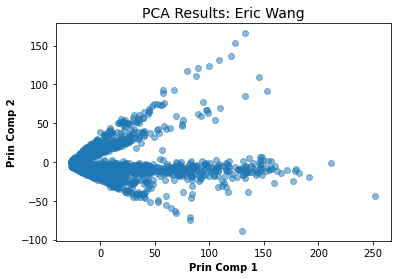

In [93]:
# plt.scatter(pca_res[:,0],pca_res[:,1],c = len()) # c for color
plt.scatter(pca_res[:,0],pca_res[:,1], alpha=0.5)
plt.title('PCA Results: Eric Wang').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

### KMeans Analysis

1. Elbow Method
2. Analysis with Silhouette Scores

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10,"max_iter": 300, "random_state": 42, "n_jobs":-1,}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)